In [ ]:
#take a dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ananya.csv')

print(df)

                 datetime      open      high       low     close       volume
0     2018-01-01 05:30:00  13715.65  13715.65  13155.38  13410.03  1676.204807
1     2018-01-01 09:30:00  13434.98  13818.55  13322.15  13570.35  1302.214836
2     2018-01-01 13:30:00  13569.98  13735.24  13001.13  13220.56  1319.755931
3     2018-01-01 17:30:00  13220.56  13330.00  12750.00  13247.00  1831.933153
4     2018-01-01 21:30:00  13247.00  13290.65  12940.00  13240.37  1092.337234
...                   ...       ...       ...       ...       ...          ...
8926  2022-01-30 13:30:00  38244.98  38359.26  37795.00  38110.02  4712.873740
8927  2022-01-30 17:30:00  38110.03  38153.82  37712.05  37980.09  2934.129800
8928  2022-01-30 21:30:00  37977.47  38074.76  37442.52  37512.37  3351.248670
8929  2022-01-31 01:30:00  37512.37  38230.00  37351.63  37881.76  4375.453430
8930  2022-01-31 05:30:00  37881.75  37951.07  36632.61  37025.68  7138.369070

[8931 rows x 6 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8931 entries, 0 to 8930
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  8931 non-null   object 
 1   open      8931 non-null   float64
 2   high      8931 non-null   float64
 3   low       8931 non-null   float64
 4   close     8931 non-null   float64
 5   volume    8931 non-null   float64
dtypes: float64(5), object(1)
memory usage: 418.8+ KB


In [ ]:
df=df.dropna()
df

datetime      open      high       low     close       volume
0     2018-01-01 05:30:00  13715.65  13715.65  13155.38  13410.03  1676.204807
1     2018-01-01 09:30:00  13434.98  13818.55  13322.15  13570.35  1302.214836
2     2018-01-01 13:30:00  13569.98  13735.24  13001.13  13220.56  1319.755931
3     2018-01-01 17:30:00  13220.56  13330.00  12750.00  13247.00  1831.933153
4     2018-01-01 21:30:00  13247.00  13290.65  12940.00  13240.37  1092.337234
...                   ...       ...       ...       ...       ...          ...
8926  2022-01-30 13:30:00  38244.98  38359.26  37795.00  38110.02  4712.873740
8927  2022-01-30 17:30:00  38110.03  38153.82  37712.05  37980.09  2934.129800
8928  2022-01-30 21:30:00  37977.47  38074.76  37442.52  37512.37  3351.248670
8929  2022-01-31 01:30:00  37512.37  38230.00  37351.63  37881.76  4375.453430
8930  2022-01-31 05:30:00  37881.75  37951.07  36632.61  37025.68  7138.369070

[8931 rows x 6 columns]

In [ ]:
df.shape

(8931, 6)

In [ ]:
df.size

53586

In [ ]:
if 'datetime' not in df.columns:
    df['datetime'] = pd.to_datetime(df.date)

df

date  price   datetime
0 2022-01-01    100 2022-01-01
1 2022-01-02    101 2022-01-02
2 2022-01-03    102 2022-01-03
3 2022-01-04    103 2022-01-04

In [ ]:
df['year'] = df['datetime'].dt.year

df

date  price   datetime  year
0 2022-01-01    100 2022-01-01  2022
1 2022-01-02    101 2022-01-02  2022
2 2022-01-03    102 2022-01-03  2022
3 2022-01-04    103 2022-01-04  2022

In [ ]:
df['date'] = df['date'].astype('datetime64[ns]')

In [ ]:
df.dtypes

datetime    datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume             float64
dtype: object

In [ ]:
# prompt: clean outliners of above dataframe

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


<Axes: >

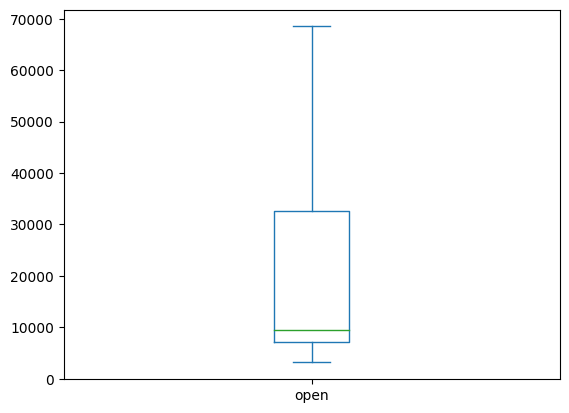

In [ ]:
df['open'].plot.box()

<Axes: xlabel='high', ylabel='low'>

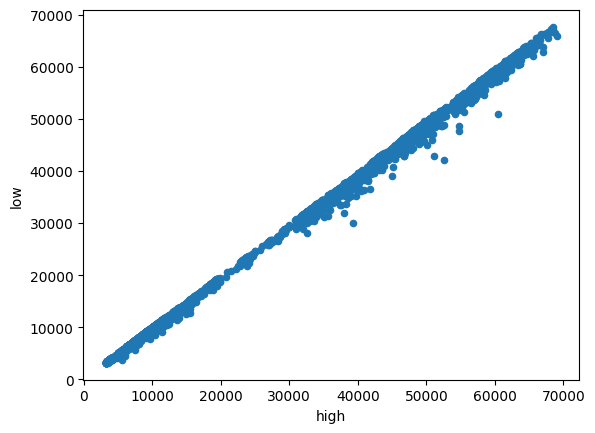

In [ ]:
df.plot.scatter('high','low')

<Axes: xlabel='close', ylabel='volume'>

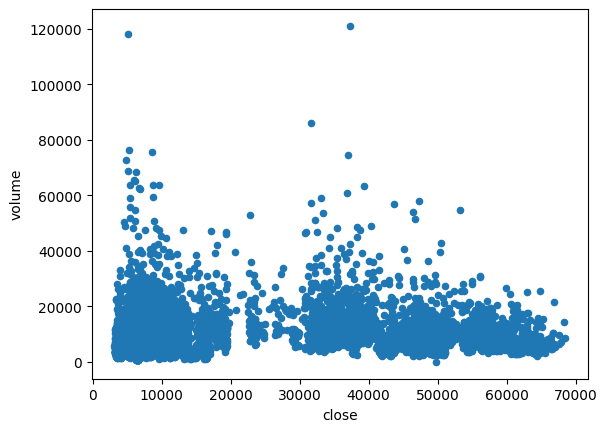

In [ ]:
df.plot.scatter('close','volume')

<Axes: xlabel='close', ylabel='volume'>

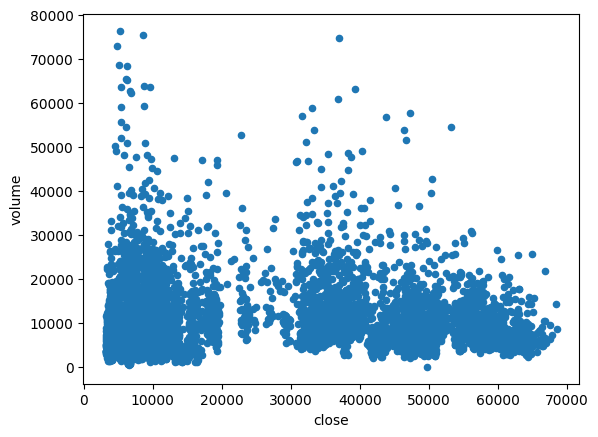

In [ ]:
df=df[df['volume']<85000]
df.plot.scatter('close','volume')

In [ ]:
volume_threshold=2
df['volume average']=df['volume'].rolling(window=20).mean()
df['split indicator']=(df['volume']>volume_threshold*df['volume average']).astype(int)


<ipython-input-14-6ef59d26753c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volume average']=df['volume'].rolling(window=20).mean()
<ipython-input-14-6ef59d26753c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split indicator']=(df['volume']>volume_threshold*df['volume average']).astype(int)


In [ ]:
from pickle import FALSE
split_factor=df['split indicator'].groupby((df['split indicator']==0).cumsum()).cumsum()+1
df['adjusted close']=df['close']/split_factor
df=df.drop(['volume average','split indicator'],axis=1)
df.to_csv('adjusted_data_without_split_factor.csv',index=FALSE)

<ipython-input-15-afeb226657ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adjusted close']=df['close']/split_factor


In [ ]:
df

datetime      open      high       low     close       volume  \
0    2018-01-01 05:30:00  13715.65  13715.65  13155.38  13410.03  1676.204807   
1    2018-01-01 09:30:00  13434.98  13818.55  13322.15  13570.35  1302.214836   
2    2018-01-01 13:30:00  13569.98  13735.24  13001.13  13220.56  1319.755931   
3    2018-01-01 17:30:00  13220.56  13330.00  12750.00  13247.00  1831.933153   
4    2018-01-01 21:30:00  13247.00  13290.65  12940.00  13240.37  1092.337234   
...                  ...       ...       ...       ...       ...          ...   
8926 2022-01-30 13:30:00  38244.98  38359.26  37795.00  38110.02  4712.873740   
8927 2022-01-30 17:30:00  38110.03  38153.82  37712.05  37980.09  2934.129800   
8928 2022-01-30 21:30:00  37977.47  38074.76  37442.52  37512.37  3351.248670   
8929 2022-01-31 01:30:00  37512.37  38230.00  37351.63  37881.76  4375.453430   
8930 2022-01-31 05:30:00  37881.75  37951.07  36632.61  37025.68  7138.369070   

      adjusted close  
0           13410.03  
1           13570.35  
2           13220.56  
3           13247.00  
4           13240.37  
...              ...  
8926        38110.02  
8927        37980.09  
8928        37512.37  
8929        37881.76  
8930        37025.68  

[8928 rows x 7 columns]

In [ ]:
split_factor

0       1
1       1
2       1
3       1
4       1
       ..
8926    1
8927    1
8928    1
8929    1
8930    1
Name: split indicator, Length: 8928, dtype: int64

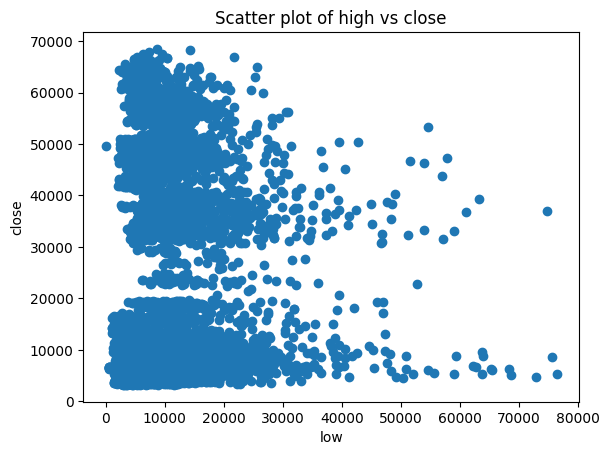

Pearson correlation coefficient: 0.162


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Assuming your data is in a pandas DataFrame named 'df'
# with 'feature' being the name of your feature and 'target' the name of your target variable

feature = df['volume']
target = df['close']

plt.scatter(feature, target)
plt.xlabel('volume')
plt.ylabel('close')
plt.title('Scatter plot of voulme vs close')
plt.show()

corr, _ = pearsonr(feature,target)
print('Pearson correlation coefficient: %.3f' % corr)

<ipython-input-19-d545fbe970a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][df['close'] > df['MA']] = 1
<ipython-input-19-d545fbe970a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][df['close'] < df['MA']] = -1


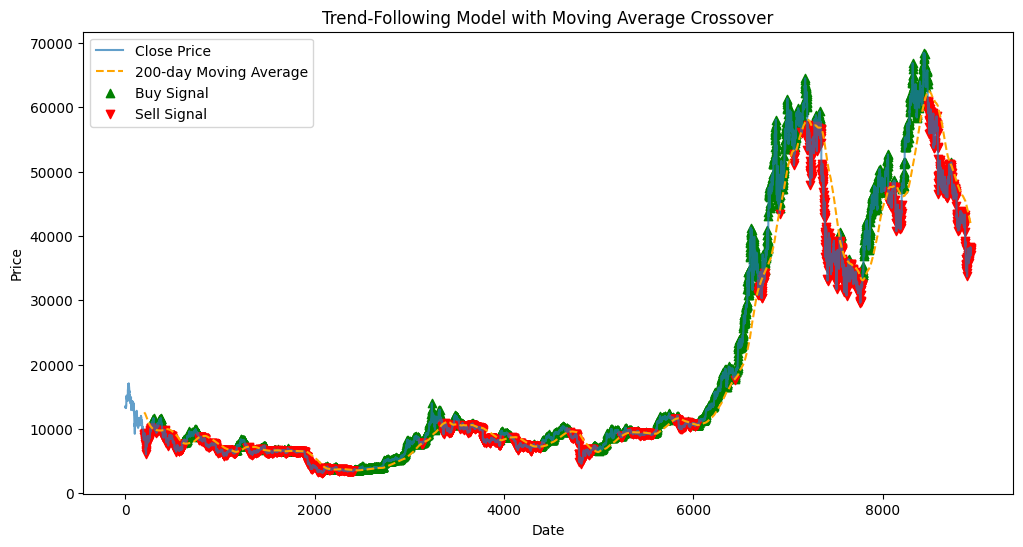

In [ ]:



window = 200


df['MA'] = df['close'].rolling(window=window).mean()


df['Signal'] = 0
df['Signal'][df['close'] > df['MA']] = 1
df['Signal'][df['close'] < df['MA']] = -1
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Close Price', alpha=0.7)
plt.plot(df['MA'], label=f'{window}-day Moving Average', linestyle='--', color='orange')
plt.scatter(df.index[df['Signal'] == 1], df['close'][df['Signal'] == 1], marker='^', color='g', label='Buy Signal')
plt.scatter(df.index[df['Signal'] == -1], df['close'][df['Signal'] == -1], marker='v', color='r', label='Sell Signal')
plt.title('Trend-Following Model with Moving Average Crossover')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

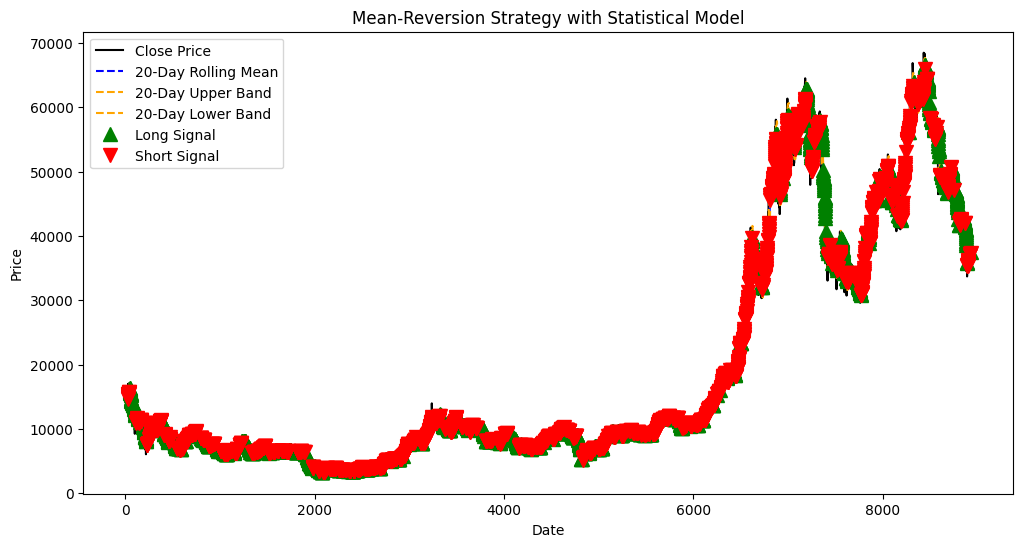

In [ ]:

# Calculate the rolling mean and standard deviation
lookback_period = 20  # Adjust as needed
df['RollingMean'] = df['close'].rolling(window=lookback_period).mean()
df['RollingStd'] = df['close'].rolling(window=lookback_period).std()

# Implement a basic mean-reversion strategy
df['Z-Score'] = (df['close'] - df['RollingMean']) / df['RollingStd']

# Define entry and exit signals based on Z-Score thresholds
entry_threshold = -1.0
exit_threshold = 1.0
df['LongSignal'] = np.where(df['Z-Score'] < entry_threshold, 1, 0)
df['ShortSignal'] = np.where(df['Z-Score'] > exit_threshold, -1, 0)

# Generate trading signals and calculate daily returns
df['Signal'] = df['LongSignal'] + df['ShortSignal']
df['DailyReturns'] = df['close'].pct_change() * df['Signal'].shift(1)

# Cumulative returns
df['CumulativeReturns'] = (1 + df['DailyReturns']).cumprod()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Close Price', color='black')
plt.plot(df['RollingMean'], label=f'{lookback_period}-Day Rolling Mean', linestyle='--', color='blue')
plt.plot(df['RollingMean'] + df['RollingStd'], label=f'{lookback_period}-Day Upper Band', linestyle='--', color='orange')
plt.plot(df['RollingMean'] - df['RollingStd'], label=f'{lookback_period}-Day Lower Band', linestyle='--', color='orange')
plt.plot(df.index, np.where(df['LongSignal'] == 1, df['RollingMean'], np.nan), '^', markersize=10, color='g', label='Long Signal')
plt.plot(df.index, np.where(df['ShortSignal'] == -1, df['RollingMean'], np.nan), 'v', markersize=10, color='r', label='Short Signal')
plt.title('Mean-Reversion Strategy with Statistical Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

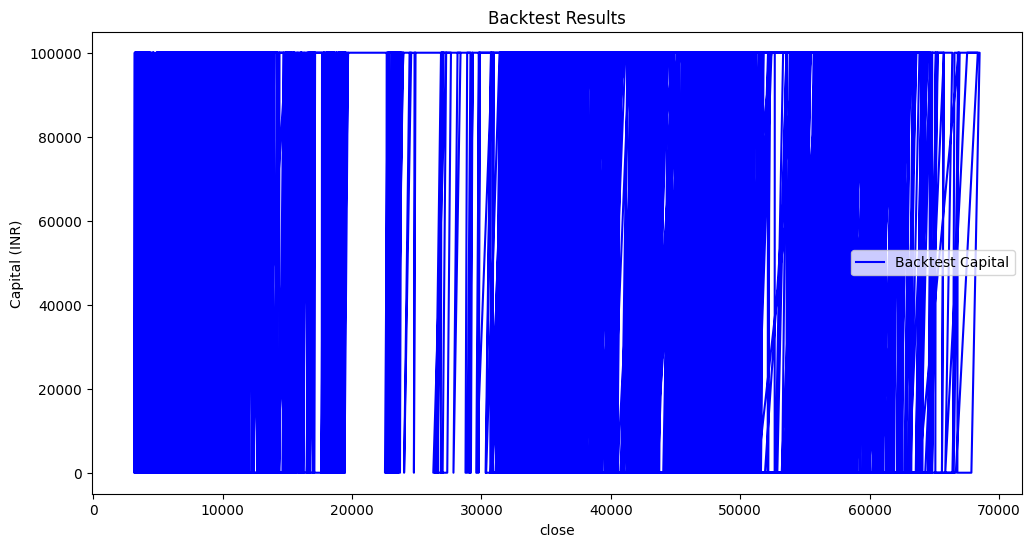

In [ ]:



initial_capital = 100000
position = 0
capital = [initial_capital]
slippage_rate=0.005
transaction_cost_rate=0.0015

for i in range(1, len(df)):
    if df['close'][i] > df['open'][i]:
        position = initial_capital / df['close'][i]
    elif df['close'][i] < df['open'][i]:
        position = 0


    capital.append(position * df['close'][i])


backtest_results = pd.DataFrame({'close': df['close'], 'Capital': capital})
backtest_results.set_index('close', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(backtest_results['Capital'], label='Backtest Capital', color='blue')
plt.title('Backtest Results')
plt.xlabel('close')
plt.ylabel('Capital (USTD)')
plt.legend()
plt.show()

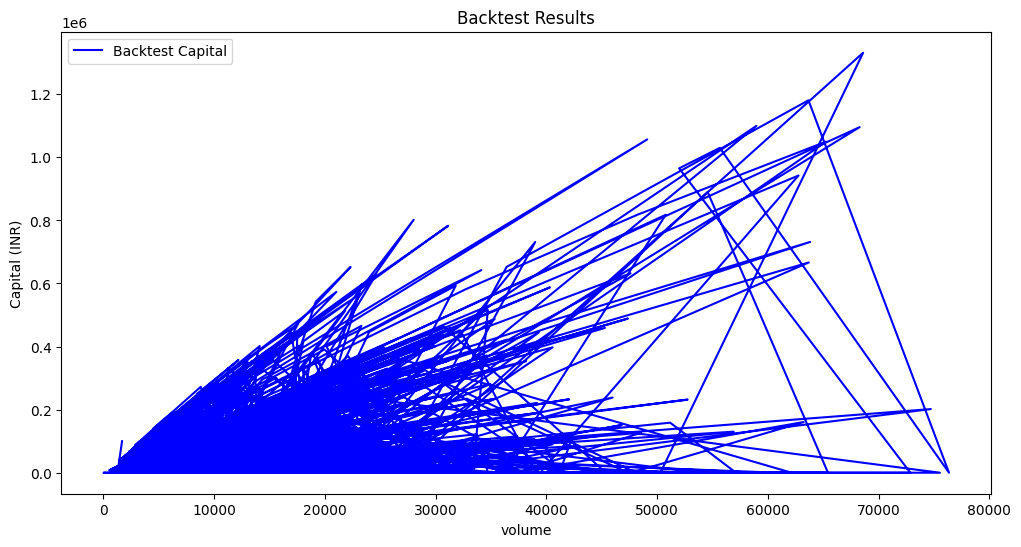

In [ ]:



initial_capital = 100000
position = 0
capital = [initial_capital]
slippage_rate=0.002
transaction_cost_rate=0.0015

for i in range(1, len(df)):
    if df['close'][i] > df['open'][i]:
        position = initial_capital / df['close'][i]
    elif df['close'][i] < df['open'][i]:
        position = 0


    capital.append(position * df['volume'][i])


backtest_results = pd.DataFrame({'volume': df['volume'], 'Capital': capital})
backtest_results.set_index('volume', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(backtest_results['Capital'], label='Backtest Capital', color='blue')
plt.title('Backtest Results')
plt.xlabel('volume')
plt.ylabel('Capital (USTD)')
plt.legend()
plt.show()

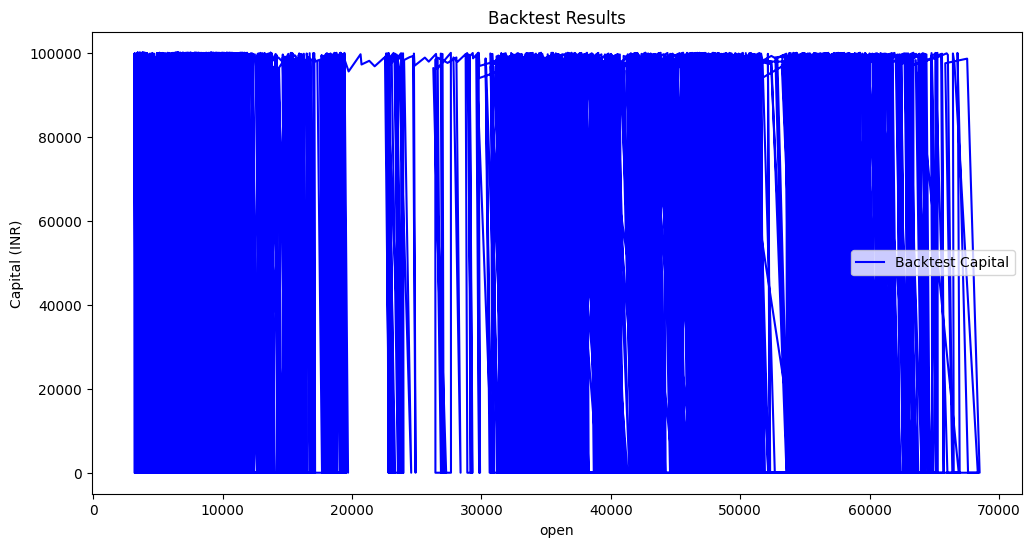

In [ ]:



initial_capital = 100000
position = 0
capital = [initial_capital]
slippage_rate=0.002
transaction_cost_rate=0.0015

for i in range(1, len(df)):
    if df['close'][i] > df['open'][i]:
        position = initial_capital / df['close'][i]
    elif df['close'][i] < df['open'][i]:
        position = 0


    capital.append(position * df['open'][i])


backtest_results = pd.DataFrame({'open': df['open'], 'Capital': capital})
backtest_results.set_index('open', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(backtest_results['Capital'], label='Backtest Capital', color='blue')
plt.title('Backtest Results')
plt.xlabel('open')
plt.ylabel('Capital (USTD)')
plt.legend()
plt.show()

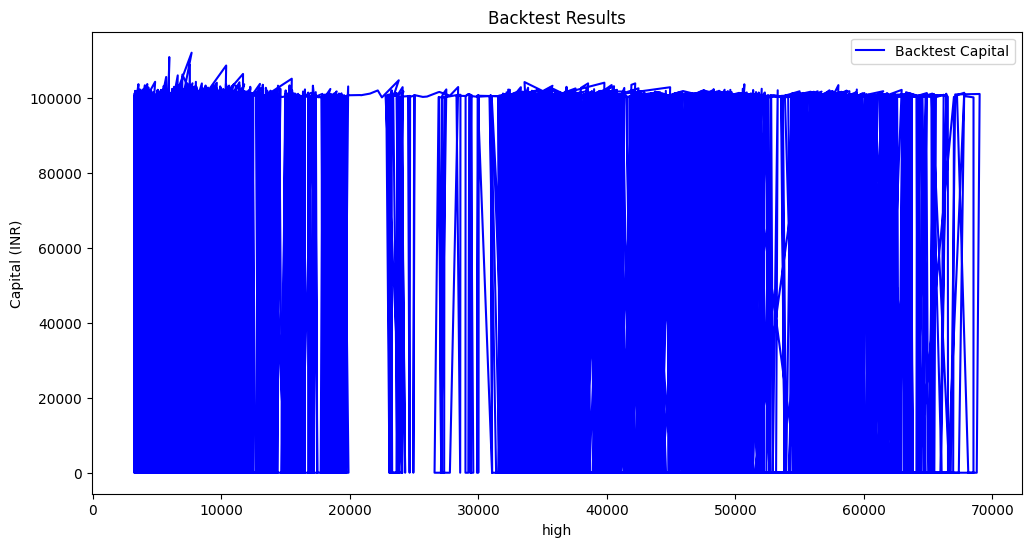

In [ ]:



initial_capital = 100000
position = 0
capital = [initial_capital]
slippage_rate=0.002
transaction_cost_rate=0.0015

for i in range(1, len(df)):
    if df['close'][i] > df['open'][i]:
        position = initial_capital / df['close'][i]
    elif df['close'][i] < df['open'][i]:
        position = 0


    capital.append(position * df['high'][i])


backtest_results = pd.DataFrame({'high': df['high'], 'Capital': capital})
backtest_results.set_index('high', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(backtest_results['Capital'], label='Backtest Capital', color='blue')
plt.title('Backtest Results')
plt.xlabel('high')
plt.ylabel('Capital (USTD)')
plt.legend()
plt.show()

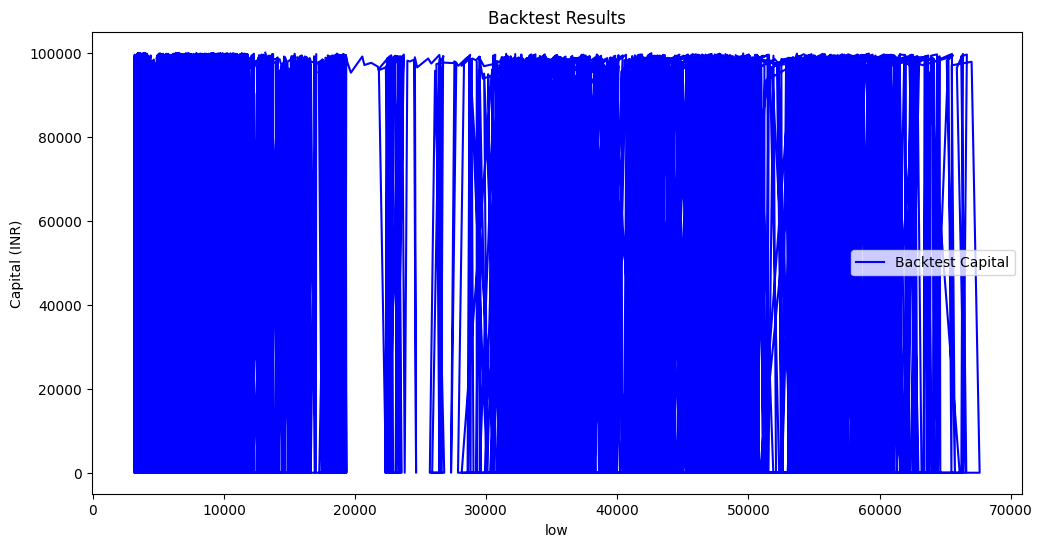

In [ ]:



initial_capital = 100000
position = 0
capital = [initial_capital]
slippage_rate=0.002
transaction_cost_rate=0.0015
for i in range(1, len(df)):
    if df['close'][i] > df['open'][i]:
        position = initial_capital / df['close'][i]
    elif df['close'][i] < df['open'][i]:
        position = 0


    capital.append(position * df['low'][i])


backtest_results = pd.DataFrame({'low': df['low'], 'Capital': capital})
backtest_results.set_index('low', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(backtest_results['Capital'], label='Backtest Capital', color='blue')
plt.title('Backtest Results')
plt.xlabel('low')
plt.ylabel('Capital (USTD)')
plt.legend()
plt.show()

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

# Sample Data
data = {
    'date': pd.date_range(start='2018-01-01', periods=252*5, freq='D'),
    'price': [100 + 5 * i for i in range(252*5)]
}

df = pd.DataFrame(data)

# Calculate SMA
df['SMA'] = df['price'].rolling(window=20).mean()

# Generate Signals
df['signal'] = 0.0
df.loc[df['SMA'] > df['price'], 'signal'] = 1.0
df.loc[df['SMA'] < df['price'], 'signal'] = -1.0

# Initialize Portfolio
capital = 10000
shares = 0
cash = capital

# Execute Trades
for i in range(1, len(df)):
    date = df.iloc[i]['date']
    signal = df.iloc[i]['signal']
    if signal != 0:
        if cash > 0:
            shares += 1
            cash -= df.iloc[i]['price']
        else:
            cash += df.iloc[i]['price']
            shares -= 1

# Calculate Performance Statistics
equity = df.iloc[-1]['price'] * shares
portfolio_value = equity + cash
gain_loss = portfolio_value - capital

print("Portfolio Value: ", portfolio_value)
print("Gain/Loss: ", gain_loss)

Portfolio Value:  227040
Gain/Loss:  217040


In [ ]:
df = df.reset_index()

In [ ]:
import numpy as np
import pandas as pd

# Define the dataframe
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-02', '2022-01-03','2022-01-04'],
    'price': [100, 101, 102,103]
})
df['date']=pd.to_datetime(df['date'])

# Calculate CAGR
capital = 10000
years = 5
def cagr(df, capital, years):
    cagr_val = np.log1p(df['price'].iloc[-1]/df['price'].iloc[0])**(1/years)-1
    return cagr_val
cag_val=cagr(df,capital,years)

# Calculate Max Drawdown
price_returns = df['price'].pct_change()
def max_drawdown(price_returns):

 max_drawdown = 0
 current_drawdown = 0
 for return_ in price_returns:
    current_drawdown = max(0, current_drawdown + return_)
    max_drawdown = max(max_drawdown, current_drawdown)

 return  max_drawdown
max_dd=max_drawdown(price_returns)

# Calculate Monthly Returns
def monthly_returns(df):
    monthly_returns=df['price'].pct_change()
    return monthly_returns
monthly_ret=monthly_returns(df)


# Print Results
print(f"CAGR: {cag_val * 100}%")
print(f"Max Drawdown: {max_dd* 100}%")
print(f"Monthly Returns: {monthly_ret * 100}%")

CAGR: -6.672196950274712%
Max Drawdown: 2.9704911667637335%
Monthly Returns: 0         NaN
1    1.000000
2    0.990099
3    0.980392
Name: price, dtype: float64%


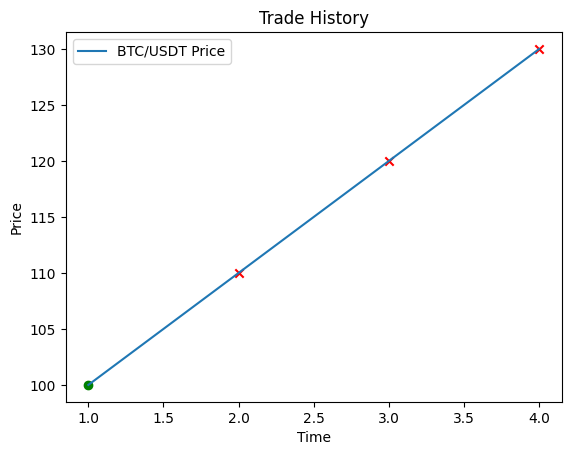

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'trades' is a DataFrame containing the trade information
fig, ax = plt.subplots()
trades = pd.DataFrame({'Timestamp': [1, 2, 3,4], 'Price': [100, 110, 120,130],'Type':['Buy','Sell','Bye','Sell']})
# Plot the BTC/USDT price as a background
ax.plot(trades['Timestamp'], trades['Price'], label='BTC/USDT Price')

# Plot the entry and exit points of each trade
for i, row in trades.iterrows():
    ax.scatter(row['Timestamp'], row['Price'], marker='o' if row['Type'] == 'Buy' else 'x', color='g' if row['Type'] == 'Buy' else 'r')

ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Trade History')
ax.legend()
plt.show()

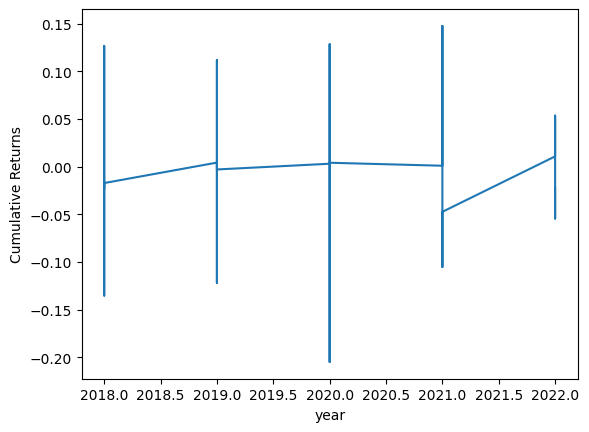

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Import the investment data
df = pd.read_csv('/content/ananya.csv')
df['datetime']=pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year


# Calculate the cumulative returns of the investmen
df['Cumulative Returns'] = (df['close'] - df['open']) / df['open']

# Plot the cumulative returns over time
plt.plot(df['year'], df['Cumulative Returns'])
plt.xlabel('year')
plt.ylabel('Cumulative Returns')

plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('/content/ananya.csv')
# Calculate the Gross Profit for each trade
df['GrossProfit'] = (df['close'] - df['open']) * df['volume']

# Calculate the Total Gross Profit
total_gross_profit = df['GrossProfit'].sum()

print(f"Total Gross Profit: {total_gross_profit}")
# Assuming the DataFrame has a 'Gross Profit' column indicating the gross profit for each trade

# Calculate the gross loss

# Calculate the total profit for each trade
df['Profit'] = (df['close'] - df['open']) * df['volume']

# Calculate the total net profit
total_net_profit = df['Profit'].sum()

print(f"Total Net Profit: {total_net_profit}")
# Calculate the average total profit per trade
average_profit_per_trade = df['Profit'].mean()

# Assuming the tax rate is constant across all trades, we can find the tax rate by using the formula:
# (total_net_profit - (number_of_trades * average_profit_per_trade)) / total_net_profit

tax_rate = (total_net_profit - (df.shape[0] * average_profit_per_trade)) / total_net_profit

print(f"Estimated Tax Rate: {tax_rate}")
# Calculate the total number of closed trades
total_closed_trades = df.shape[0]

print(f"Total Closed Trades: {total_closed_trades}")
# Assuming the DataFrame has a 'Profit' column indicating whether a trade is a win or a loss
# with positive values for wins and negative values for losses

# Calculate the total number of winning trades
total_winning_trades = df[df['Profit'] > 0].shape[0]

# Calculate the total number of losing trades
total_losing_trades = df[df['Profit'] < 0].shape[0]

# Calculate the win rate
win_rate = total_winning_trades / (total_winning_trades + total_losing_trades)

print(f"Win Rate: {win_rate:.2%}")


Total Gross Profit: -928545467.3366365
Total Net Profit: -928545467.3366365
Estimated Tax Rate: -0.0
Total Closed Trades: 8931
Win Rate: 51.37%


In [ ]:
df['Gross Profit'] = df['volume'] * (df['close'] - df['open'])
df_gross_loss = df[df['Gross Profit'].apply(lambda x: x < 0)]
gross_loss = df_gross_loss['Gross Profit'].sum()

print(f"Gross Loss: {gross_loss:.2f}")
df['Profit'] = (df['close'] - df['open']) * df['volume']
average_winning_trade = df['Profit'][df['Profit'] > 0].mean()
print(f"Average winning trade: {average_winning_trade:.2f}")
average_lossing_trade = df['Profit'][df['Profit'] < 0].mean()
print(f"Average lossing trade: {average_lossing_trade:.2f}")







Gross Loss: -14713272175.43
Average winning trade: 3005172.60
Average lossing trade: -3388593.32


In [ ]:
print(df[['volume', 'open', 'close']].describe())



              volume          open         close
count    8931.000000   8931.000000   8931.000000
mean     9085.443290  18806.488687  18809.137391
std      7276.565544  17865.357280  17866.355798
min         5.887034   3172.620000   3172.050000
25%      4696.336885   7134.195000   7134.210000
50%      7126.196612   9525.000000   9525.590000
75%     11003.907107  32691.135000  32713.100000
max    121040.676466  68490.000000  68490.000000


In [ ]:
average_winning_trade = df['Profit'][df['Profit'] > 0].mean()
trades_above_average = df[df['Profit'] > average_winning_trade]
largest_winning_trade = trades_above_average['Profit'].max()
percentage_change_from_average = (largest_winning_trade / average_winning_trade) - 1
print("The largest winning trade from average winning trade is", largest_winning_trade, "with a percentage change of", percentage_change_from_average * 100, "%.")
average_lossing_trade = df['Profit'][df['Profit'] < 0].mean()
trades_below_average = df[df['Profit'] < average_lossing_trade]
largest_lossing_trade = trades_below_average['Profit'].min()
percentage_change_from_average = (largest_lossing_trade / average_lossing_trade) - 1
print("The largest losing trade from average losing trade is", largest_lossing_trade, "with a percentage change of", percentage_change_from_average * 100, "%.")

The largest winning trade from average winning trade is 355576977.0673377 with a percentage change of 11732.164890511294 %.
The largest losing trade from average losing trade is -275065153.20261747 with a percentage change of 8017.384637254656 %.


In [114]:
import numpy as np

long_position = False
short_position = False
stop_loss_percent = 0.05
take_profit_percent = 0.10
stop_loss_price = 0
take_profit_price = 0
def generate_trade_signal(data):
    global trade_signal
    # Calculate the indicators using the TA-Lib or other libraries
    # For example: SMA50 = data['Close'].rolling(window=50).mean()

    # Implement your trading rules here
    # For example: if data['Close'] > SMA50: return 'Buy'

    # This is just a placeholder, replace with your actual trading rules
    return np.random.choice(['Buy', 'Sell', 'Hold'])
    for i in range(1, len(data)):

        trade_signal = generate_trade_signal(data.iloc[i])

    if trade_signal == 'Buy':
        long_position = True
        short_position = False
        stop_loss_price = data.iloc[i]['close'] * (1 - stop_loss_percent)
        take_profit_price = data.iloc[i]['close'] * (1 + take_profit_percent)

    elif trade_signal == 'Sell':
        long_position = False
        short_position = True
        stop_loss_price = data.iloc[i]['close'] * (1 + stop_loss_percent)
        take_profit_price = data.iloc[i]['close'] * (1 - take_profit_percent)

    # Implement stop-loss logic
    if long_position and data.iloc[i]['close'] <= stop_loss_price:
        long_position = False
        print("Closed the long position due to stop-loss.")

    if short_position and data.iloc[i]['close'] >= stop_loss_price:
        short_position = False
        print("Closed the short position due to stop-loss.")

    # Implement take-profit logic
    if long_position and data.iloc[i]['close'] >= take_profit_price:
        long_position = False
        print("Closed the long position due to take-profit.")

    if short_position and data.iloc[i]['close'] <= take_profit_price:
        short_position = False
        print("Closed the short position due to take-profit.")
        trade_signal = generate_trade_signal(data.iloc[i])
        print("Generated trade signal: ", trade_signal)

    if trade_signal == 'Buy':
    # ...
        print("Opened a long position. Stop-loss price: ", stop_loss_price, ". Take-profit price: ", take_profit_price)

    elif trade_signal == 'Sell':
    # ...
        print("Opened a short position. Stop-loss price: ", stop_loss_price, ". Take-profit price: ", take_profit_price)